In [1]:
import gdown
import shutil
from astrohack import panel
import os

In [2]:
# Download VLA Holography with known panel deviationsurl = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
datafolder = "./paneldata/"
os.makedirs(name=datafolder, exist_ok=True)
panelzip = datafolder+"panel.zip"
if not os.path.exists(panelzip):
    url = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
    gdown.download(url, panelzip)
shutil.unpack_archive(filename=panelzip, extract_dir=datafolder)

In [3]:
# Set some parameters:
telescope = 'VLA'
panelkind = 'corotatedparaboloid'
ampimg    = datafolder+'amp.fits'
devimg    = datafolder+'dev.fits'
basename  = 'antenna25'

CPU times: user 14.8 s, sys: 2.26 s, total: 17.1 s
Wall time: 14.5 s


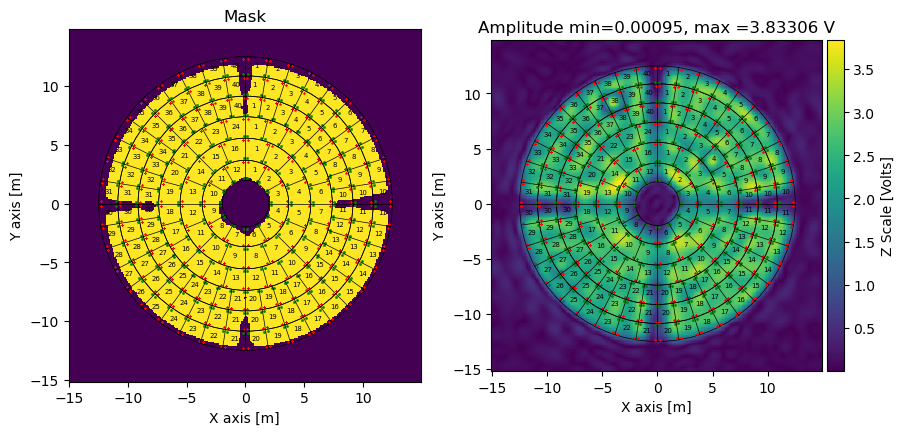

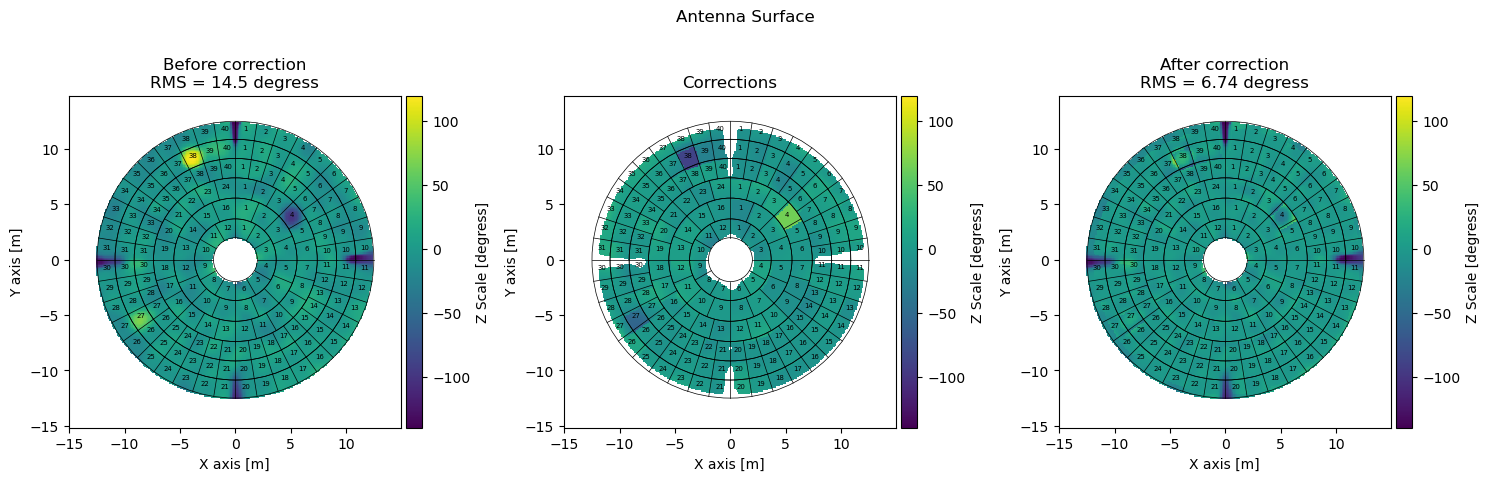

In [4]:
%%time
# Execute Panel chunk
panel._panel_chunk(basename, ampimg, devimg, telescope, pkind=panelkind,
                  savemask=True, savephase=True)

In [5]:
# Display report
!cat antenna25/report.txt

Gains before correction: Real: 1.02e+02 dB, Theoretical: 1.03e+02 dB
RMS before correction:   0.481 mm

Gains after correction: Real: 1.03e+02 dB, Theoretical: 1.03e+02 dB
RMS after correction:   0.222 mm
